# Homework 3 - Berkeley STAT 157

Handout 2/5/2019, due 2/12/2019 by 4pm in Git by committing to your repository.

**Formatting: please include both a .ipynb and .pdf file in your homework submission, named homework3.ipynb and homework3.pdf. You can export your notebook to a pdf either by File -> Download as -> PDF via Latex (you may need Latex installed), or by simply printing to a pdf from your browser (you may want to do File -> Print Preview in jupyter first). Please don't change the filename.**       

In [1]:
from mxnet import nd, autograd, gluon
import matplotlib.pyplot as plt

# 1. Logistic Regression for Binary Classification

In multiclass classification we typically use the exponential model 

$$p(y|\mathbf{o}) = \mathrm{softmax}(\mathbf{o})_y = \frac{\exp(o_y)}{\sum_{y'} \exp(o_{y'})}$$

1.1. Show that this parametrization has a spurious degree of freedom. That is, show that both $\mathbf{o}$ and $\mathbf{o} + c$ with $c \in \mathbb{R}$ lead to the same probability estimate.

**Answer:** $$p(y|\mathbf{o}) = \mathrm{softmax}(\mathbf{o})_y = \frac{\exp(o_y)}{\sum_{y'} \exp(o_{y'})}$$

$$p(y|\mathbf{o + c}) = \mathrm{softmax}(\mathbf{o + c})_y = \frac{\exp(o_y + c)}{\sum_{y'} \exp(o_{y'} + c)}$$

$$ = \frac{\exp(o_y) * \exp(c)}{(\sum_{y'} \exp(o_{y'})) * \exp(c) }$$

$$ = \frac{\exp(o_y)}{\sum_{y'} \exp(o_{y'})}$$


1.2. For binary classification, i.e. whenever we have only two classes $\{-1, 1\}$, we can arbitrarily set $o_{-1} = 0$. Using the shorthand $o = o_1$ show that this is equivalent to 

$$p(y=1|o) = \frac{1}{1 + \exp(-o)}$$

**Answer:** $$p(y=1|o)$$

$$= \frac{\exp(o)}{\exp(0) + \exp(o)}$$

$$= \frac{\exp(o)}{1 + \exp(o)}$$

$$= \frac{\frac{\exp(o)}{\exp(o)}}{\frac{1}{\exp(o)} + \frac{\exp(o)}{\exp(o)}}
$$

$$= \frac{1}{1 + \exp(-o)}$$

$$p(y=1|o) = \frac{1}{1 + \exp(-o)}$$

1.3. Show that the log-likelihood loss (often called logistic loss) for labels $y \in \{-1, 1\}$ is thus given by 

$$-\log p(y|o) = \log (1 + \exp(-y \cdot o))$$

**Answer:**

The two probabilities are effectively very similar and the difference between the two is the fact that there is a negative sign on the denomitator's exponent. Using the result from 1.2,

$$p(y=1|o) = \frac{1}{1 + \exp(-o)}  $$ 

Since these probabilities need to sum up to 1, 

$$\ p(y=-1|o) = \frac{\exp(-o)}{1 + \exp(-o)} = \frac{\exp(-o) \cdot \exp(o)}{1 \cdot \exp(o) + \exp(-o) \cdot \exp(o)} = \frac{1}{1 + \exp(o)}$$ 

we can alter this form of the equation to receive the desired result in one equation. 

$$p(y|o) = \frac{1}{1 + \exp(-y \cdot o)} \\\ \log p(y|o) = -\log(1 + \exp(-y \cdot o)) \\ -\log p(y|o) = \log(1 + \exp(-y \cdot o))$$

1.4. Show that for $y = 1$ the logistic loss asymptotes to $o$ for $o \to \infty$ and to $\exp(o)$ for $o \to -\infty$. 

**Answer:** From the previous three parts,

$$-\log p(y|o) = \log (1 + \exp(-y \cdot o))$$

$$-\log p(y = 1|o) = \log (1 + \exp(-o))$$

as,  $o \to \infty$ and as $\exp(-o) \to 0$. 

# 2. Logistic Regression and Autograd

1. Implement the binary logistic loss $l(y,o) = \log (1 + \exp(-y \cdot o))$ in Gluon
1. Plot its values for $y \in \{-1, 1\}$ over the range of $o \in [-5, 5]$.
1. Plot its derivative with respect to $o$ for $o \in [-5, 5]$ using 'autograd'.

In [21]:
def loss(y,o):
    ## add your loss function here
    return (nd.log(1+nd.exp(-y*o)))

import numpy as np
o = nd.arange(-5, 5.1, .1)
negatedY = nd.zeros(len(o))
posifiedY = nd.zeros(len(o))
negatedLoss = loss(-1, o)
posifiedLoss = loss(1, o)

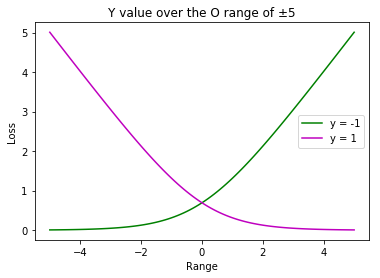

In [28]:
plt.plot(o.asnumpy(), negatedLoss.asnumpy(), label = 'y = -1', color = 'g')
plt.plot(o.asnumpy(), posifiedLoss.asnumpy(), label = 'y = 1', color = 'm')
plt.title("Y value over the O range of ±5")
plt.ylabel("Loss")
plt.xlabel("Range")
plt.legend()
plt.show()

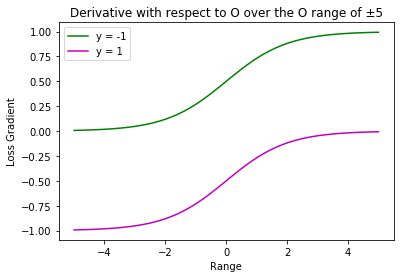

In [30]:
posifiedO = o.copy()
negafiedO = o.copy()

posifiedO.attach_grad()
negafiedO.attach_grad()

with autograd.record():
    negatedLoss = loss(-1, negafiedO)
    posifiedLoss = loss(1, posifiedO)
negatedLoss.backward()
posifiedLoss.backward()

plt.plot(o.asnumpy(), negafiedO.grad.asnumpy(),label = 'y = -1', color = 'g')
plt.plot(o.asnumpy(), posifiedO.grad.asnumpy(), label = 'y = 1', color = 'm')
plt.title("Derivative with respect to O over the O range of ±5")
plt.ylabel("Loss Gradient")
plt.xlabel("Range")
plt.legend()

# 3. Ohm's Law

Imagine that you're a young physicist, maybe named [Georg Simon Ohm](https://en.wikipedia.org/wiki/Georg_Ohm), trying to figure out how current and voltage depend on each other for resistors. You have some idea but you aren't quite sure yet whether the dependence is linear or quadratic. So you take some measurements, conveniently given to you as 'ndarrays' in Python. They are indicated by 'current' and 'voltage'.

Your goal is to use least mean squares regression to identify the coefficients for the following three models using automatic differentiation and least mean squares regression. The three models are:

1. Quadratic model where $\mathrm{voltage} = c + r \cdot \mathrm{current} + q \cdot \mathrm{current}^2$.
1. Linear model where $\mathrm{voltage} = c + r \cdot \mathrm{current}$.
1. Ohm's law where $\mathrm{voltage} = r \cdot \mathrm{current}$.

In [32]:
current = nd.array([1.5420291, 1.8935232, 2.1603365, 2.5381863, 2.893443, \
                    3.838855, 3.925425, 4.2233696, 4.235571, 4.273397, \
                    4.9332876, 6.4704757, 6.517571, 6.87826, 7.0009003, \
                    7.035741, 7.278681, 7.7561755, 9.121138, 9.728281])
voltage = nd.array([63.802246, 80.036026, 91.4903, 108.28776, 122.781975, \
                    161.36314, 166.50816, 176.16772, 180.29395, 179.09758, \
                    206.21027, 272.71857, 272.24033, 289.54745, 293.8488, \
                    295.2281, 306.62274, 327.93243, 383.16296, 408.65967])

In [40]:
from mxnet.gluon import loss as gloss, nn
from mxnet.gluon import data as gdata
from mxnet import init

loss = gloss.L2Loss() 
batch_size = 20 
num_epochs = 20

# Data Preprocessing
quadraticCurr = np.vstack((current.asnumpy(), current.asnumpy()**2))
quadraticCurr = nd.array(quadraticCurr.T)
quadraticOutput = gdata.ArrayDataset(quadraticCurr, voltage)
quadraticOutputIterat = gdata.DataLoader(quadraticOutput, 
                                         batch_size, shuffle=True)

# Build Model
quadraticModel = nn.Sequential() 
quadraticModel.add(nn.Dense(1, use_bias=True))

# Initialize Model 
quadraticModel.initialize(init.Normal(sigma=0.01))

# Define the Training Algorithm
quadraticTraining = gluon.Trainer(quadraticModel.collect_params(), 'sgd', {'learning_rate': 0.001})

# Training:
print("Quadratic model (Voltage = c + r⋅Current + q⋅Current^2)")
for epoch in range(1, num_epochs + 1): 
    for X, y in quadraticOutputIterat:
        with autograd.record():
            losses = loss(quadraticModel(X), y)
        losses.backward()
        quadraticTraining.step(batch_size)
    losses = loss(quadraticModel(quadraticCurr), voltage)
    print("epoch: ", epoch, " loss: ", losses.mean().asscalar())
    
# Running Model
quadraticIterat = quadraticModel.collect_params('.*weight|.*bias')
for i in quadraticIterat:
    print(i, quadraticIterat[str(i)].data())


Quadratic model (Voltage = c + r⋅Current + q⋅Current^2)
epoch:  1  loss:  18717.197
epoch:  2  loss:  12344.661
epoch:  3  loss:  8390.708
epoch:  4  loss:  5935.951
epoch:  5  loss:  4410.499
epoch:  6  loss:  3461.104
epoch:  7  loss:  2868.8037
epoch:  8  loss:  2497.8694
epoch:  9  loss:  2264.171
epoch:  10  loss:  2115.559
epoch:  11  loss:  2019.708
epoch:  12  loss:  1956.5804
epoch:  13  loss:  1913.7576
epoch:  14  loss:  1883.5391
epoch:  15  loss:  1861.1526
epoch:  16  loss:  1843.6406
epoch:  17  loss:  1829.1692
epoch:  18  loss:  1816.6012
epoch:  19  loss:  1805.232
epoch:  20  loss:  1794.625
dense6_weight 
[[2.5467165 5.1453238]]
<NDArray 1x2 @cpu(0)>
dense6_bias 
[0.82396436]
<NDArray 1 @cpu(0)>


Quadratic model where voltage = c + r * current + q * ${current}^2$.

For quadratic model where voltage = c + r * current + q * ${current}^2$.

c = 0.8242898

r = 2.550703

q = 5.1446075

For the linear model,

In [41]:
linearOutput = gdata.ArrayDataset(current, voltage)
linearOutputIterat = gdata.DataLoader(linearOutput, 
                                    batch_size, shuffle=True)

# Build Model
linearModel = nn.Sequential() 
linearModel.add(nn.Dense(1, use_bias=True))

# Initialize Model 
linearModel.initialize(init.Normal(sigma=0.01))

# Define the Training Algorithm
linearTraining = gluon.Trainer(linearModel.collect_params(), 
                                  'sgd', {'learning_rate': 0.02})

# Training:
print("Linear model: (Voltage = c + r⋅Current)")
for epoch in range(1, num_epochs + 1): 
    for X, y in linearOutputIterat:
        with autograd.record():
            losses = loss(linearModel(X), y)
        losses.backward()
        linearTraining.step(batch_size)
    losses = loss(linearModel(current), voltage)
    print("epoch: ", epoch, " loss: ", losses.mean().asscalar())
    
# Running Model
linearIterat = linearModel.collect_params('.*weight|.*bias')
for i in linearIterat:
    print(i, linearIterat[str(i)].data())

Linear model: (Voltage = c + r⋅Current)
epoch:  1  loss:  3123.4526
epoch:  2  loss:  339.7291
epoch:  3  loss:  39.82897
epoch:  4  loss:  7.5036073
epoch:  5  loss:  4.0033994
epoch:  6  loss:  3.6085763
epoch:  7  loss:  3.5484214
epoch:  8  loss:  3.52444
epoch:  9  loss:  3.5044453
epoch:  10  loss:  3.4849954
epoch:  11  loss:  3.4657452
epoch:  12  loss:  3.4466023
epoch:  13  loss:  3.4276175
epoch:  14  loss:  3.4087386
epoch:  15  loss:  3.3899841
epoch:  16  loss:  3.3713593
epoch:  17  loss:  3.3528557
epoch:  18  loss:  3.334478
epoch:  19  loss:  3.3162205
epoch:  20  loss:  3.2980735
dense7_weight 
[[41.070393]]
<NDArray 1x1 @cpu(0)>
dense7_bias 
[6.1695476]
<NDArray 1 @cpu(0)>


Linear model where voltage = c + r * current. 

For the linear model,

c = 6.1695476

r = 41.070393

For the Ohm's law model where voltage=𝑟⋅current,

In [43]:
ohmOutput = gdata.ArrayDataset(current, voltage)
ohmOutputIterat = gdata.DataLoader(ohmOutput, 
                                    batch_size, shuffle=True)

# Build Model
ohmModel = nn.Sequential() 
ohmModel.add(nn.Dense(1, use_bias=False))

# Initialize Model 
ohmModel.initialize(init.Normal(sigma=0.01))

# Define the Training Algorithm
ohmTraining = gluon.Trainer(ohmModel.collect_params(), 
                                  'sgd', {'learning_rate': 0.01})

# Training:
print("Ohm's Law model: (Voltage = r⋅Current)")
for epoch in range(1, num_epochs + 1): 
    for X, y in ohmOutputIterat:
        with autograd.record():
            losses = loss(ohmModel(X), y)
        losses.backward()
        ohmTraining.step(batch_size)
    losses = loss(ohmModel(current), voltage)
    print("epoch: ", epoch, " loss: ", losses.mean().asscalar())
    
# Running Model
ohmIterat = ohmModel.collect_params('.*weight|.*bias')
for i in ohmIterat:
    print(i, ohmIterat[str(i)].data())
    

Ohm's Law model: (Voltage = r⋅Current)
epoch:  1  loss:  13096.057
epoch:  2  loss:  5922.145
epoch:  3  loss:  2678.226
epoch:  4  loss:  1211.3817
epoch:  5  loss:  548.1
epoch:  6  loss:  248.17554
epoch:  7  loss:  112.5552
epoch:  8  loss:  51.22992
epoch:  9  loss:  23.499666
epoch:  10  loss:  10.960528
epoch:  11  loss:  5.2905836
epoch:  12  loss:  2.7266955
epoch:  13  loss:  1.5673734
epoch:  14  loss:  1.0431287
epoch:  15  loss:  0.8060891
epoch:  16  loss:  0.698892
epoch:  17  loss:  0.6504249
epoch:  18  loss:  0.62850815
epoch:  19  loss:  0.61859715
epoch:  20  loss:  0.61412054
dense9_weight 
[[42.04168]]
<NDArray 1x1 @cpu(0)>


For the Ohm's law model where voltage=𝑟⋅current,

r = 42.056705

# 4. Entropy

Let's compute the *binary* entropy of a number of interesting data sources. 

1. Assume that you're watching the output generated by a [monkey at a typewriter](https://en.wikipedia.org/wiki/File:Chimpanzee_seated_at_typewriter.jpg). The monkey presses any of the $44$ keys of the typewriter at random (you can assume that it has not discovered any special keys or the shift key yet). How many bits of randomness per character do you observe?
1. Unhappy with the monkey you replaced it by a drunk typesetter. It is able to generate words, albeit not coherently. Instead, it picks a random word out of a vocabulary of $2,000$ words. Moreover, assume that the average length of a word is $4.5$ letters in English. How many bits of randomness do you observe now?
1. Still unhappy with the result you replace the typesetter by a high quality language model. These can obtain perplexity numbers as low as 20 points per character. The perplexity is defined as a length normalized probability, i.e.

$$\mathrm{PPL}(x) = \left[p(x)\right]^{1/\mathrm{length}(x)}$$

In [45]:
# 4.1)
def entropy(probabilities):
    return -np.sum(probabilities*np.log2(probabilities))

dist = np.ones(44)/44
print(" How many bits of randomness per character do you observe? ANSWER: ",entropy(dist), "bits of randomness")

 How many bits of randomness per character do you observe? ANSWER:  5.459431618637296 bits of randomness


In [46]:
#4.2)
wordList = np.ones(2000)/2000
print("How many bits of randomness do you observe now? ANSWER: ",entropy(wordList)*np.log2(4.5), "bits of randomness")

How many bits of randomness do you observe now? ANSWER:  23.794929479711463 bits of randomness


In [48]:
#4.3)
print("ANSWER: ",entropy(wordList)*np.log2(4.5)*np.log2(20), "bits of randomness")

ANSWER:  102.8399742342285 bits of randomness


# 5. Wien's Approximation for the Temperature (bonus)

We will now abuse Gluon to estimate the temperature of a black body. The energy emanated from a black body is given by Wien's approximation.

$$B_\lambda(T) = \frac{2 h c^2}{\lambda^5} \exp\left(-\frac{h c}{\lambda k T}\right)$$

That is, the amount of energy depends on the fifth power of the wavelength $\lambda$ and the temperature $T$ of the body. The latter ensures a cutoff beyond a temperature-characteristic peak. Let us define this and plot it.

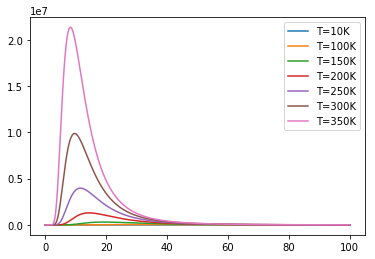

In [4]:
# Lightspeed
c = 299792458
# Planck's constant
h = 6.62607004e-34
# Boltzmann constant
k = 1.38064852e-23
# Wavelength scale (nanometers)
lamscale = 1e-6
# Pulling out all powers of 10 upfront
p_out = 2 * h * c**2 / lamscale**5
p_in = (h / k) * (c/lamscale) 

# Wien's law
def wien(lam, t):
    return (p_out / lam**5) * nd.exp(-p_in / (lam * t))

# Plot the radiance for a few different temperatures
lam = nd.arange(0,100,0.01)
for t in [10, 100, 150, 200, 250, 300, 350]:
    radiance = wien(lam, t)
    plt.plot(lam.asnumpy(), radiance.asnumpy(), label=('T=' + str(t) + 'K'))
plt.legend()
plt.show()

Next we assume that we are a fearless physicist measuring some data. Of course, we need to pretend that we don't really know the temperature. But we measure the radiation at a few wavelengths.  

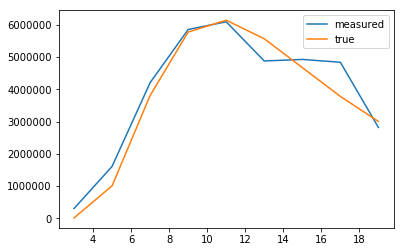

In [5]:
# real temperature is approximately 0C
realtemp = 273
# we observe at 3000nm up to 20,000nm wavelength
wavelengths = nd.arange(3,20,2)
# our infrared filters are pretty lousy ...
delta = nd.random_normal(shape=(len(wavelengths))) * 1

radiance = wien(wavelengths + delta,realtemp)
plt.plot(wavelengths.asnumpy(), radiance.asnumpy(), label='measured')
plt.plot(wavelengths.asnumpy(), wien(wavelengths, realtemp).asnumpy(), label='true')
plt.legend()
plt.show()

Use Gluon to estimate the real temperature based on the variables `wavelengths` and `radiance`. 

* You can use Wien's law implementation `wien(lam,t)` as your forward model. 
* Use the loss function $l(y,y') = (\log y - \log y')^2$ to measure accuracy.

In [ ]:
lossFunction = lambda y, y_: nd.power((nd.log(y) - nd.log(y_)),2).sum()